<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#-Комментарий-ревьюера-2" data-toc-modified-id="-Комментарий-ревьюера-2-5"><span class="toc-item-num">5&nbsp;&nbsp;</span> Комментарий ревьюера 2</a></span></li><li><span><a href="#-Комментарий-ревьюера-2" data-toc-modified-id="-Комментарий-ревьюера-2-6"><span class="toc-item-num">6&nbsp;&nbsp;</span> Комментарий ревьюера 2</a></span></li><li><span><a href="#-Комментарий-ревьюера-2" data-toc-modified-id="-Комментарий-ревьюера-2-7"><span class="toc-item-num">7&nbsp;&nbsp;</span> Комментарий ревьюера 2</a></span></li><li><span><a href="#-Комментарий-ревьюера-2" data-toc-modified-id="-Комментарий-ревьюера-2-8"><span class="toc-item-num">8&nbsp;&nbsp;</span> Комментарий ревьюера 2</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#-Комментарий-ревьюера-2" data-toc-modified-id="-Комментарий-ревьюера-2-10"><span class="toc-item-num">10&nbsp;&nbsp;</span> Комментарий ревьюера 2</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd #импорт библиотеки pandas
try: #используем конструкцию try-except чтобы 100% прочитать файл
    df = pd.read_csv('C:/Users/Полинария/Downloads/real_estate_data.csv', sep='\t') #чтение локально
except:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') #чтение файла на сервере
display(df.head()) #знакомимся с данными

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Изучив первые строки датафрейма, сразу видно, что в данных есть пропуски. Получим больше информации о данных использовав методы info() и describe().

In [2]:
df.info() #получение общей информации о датасете
df.describe() #получение статистической информации о числовых столбцах

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод

Получив информацию о данных сразу стало ясно, что данные неидеальны и датасет придется привести в пригодный для анализа вид. Прежде всего нас волнуют пропуски в столбцах. Для каждого столбца логика заполнения пропусков будет разная, подробнее в разделе предобработки данных. Кроме того таблицу необходимо проверить на дубликаты, а также привести данные о времени в формат datetime. Кроме того данные, которые могут быть выражены только целочисленно, лучше привести из вещественного типа в int64.
Из статистической информации сразу бросились в глаза 100 метровые потолки, скорее всего данные заполенны не верно. Остальные проблемы выявим на этапе предобработки данных.

## Предобработка данных

На всякий случай проверим таблицу на явные дубликаты.

In [3]:
df.duplicated().sum() 

0

Явные дубликаты отсутвуют. На всякий случай проверим уникальные значения столбцов типа object, чтобы исключить неявные дубликаты. Столбец с информацией о дате публикации игнорируем, его мы позже переведем в нужный формат. Проверим только столбец с названием населенного пункта, а также столбец с апартаментыми - в выгрузке говорилось, что он имеет булев тип, однако методом info() он показан как object.

In [4]:
display(df['is_apartment'].value_counts()) # смотрим значения и их количество в столбце апартаменты

False    2725
True       50
Name: is_apartment, dtype: int64

Действительно столбец с апартаментами - булев. Можно предположить, что пропуски связаны с тем, что если жилье не является апартаментом то арендодатель просто ничего не указывал это поле при сдаче, чтобы закончить обработку этого столбца сразу приравняем все пропуски False.

In [5]:
df['is_apartment']=df['is_apartment'].fillna(False) #заполняем пропуски
display(df['is_apartment'].value_counts()) #сразу смотрим что же вышло

False    23649
True        50
Name: is_apartment, dtype: int64

С апартаментами разобрались, но так и не проверили названия населенных пунктов на неявные дубликаты. Проверим:

In [6]:
display(df['locality_name'].value_counts()) # смотрим значения и их количество 

Санкт-Петербург               15721
посёлок Мурино                  522
посёлок Шушары                  440
Всеволожск                      398
Пушкин                          369
                              ...  
деревня Зимитицы                  1
деревня Пчева                     1
коттеджный поселок Счастье        1
деревня Котлы                     1
поселок Тёсово-4                  1
Name: locality_name, Length: 364, dtype: int64

Получилось слишком длинная Series, проверим тогда методом unique. Зато пока смотрели на результаты value_counts можно сразу увидеть, что есть места с большим количеством объявлений, а есть со слишком малым, а также как мы помним есть пропуски. Далее при работе с данными можно будет населенные пункты с малым количетсвом объявлений пометить как "Другие". А вот строки с пропущенным наименованием населенного пункта можно удалить. Их менее процента ((23699-23650)/23699 = 0,002). В будущем мы не сможем им присвоить категорию другие, так как если это обьявления из СПб то они слишком исказять данные по малонаселенным пунктам, которые в большинстве своем составляют эту категорию.

In [7]:
#display(df['locality_name'].unique()) # проверили на уникальные значения, чтобы не было неявных дубликатов, но там все ок, а код я тоже закомментирую, чтобы решение не сьедало кучу места и не мешало воспринимать код.
df = df.dropna(subset=['locality_name']) #удаляем строки с пропускмаи в населенных пунктах
df.info() #проверяем не удалилось ли лишнее, надо было удалить только 49 строк

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null float64
total_area              23650 non-null float64
first_day_exposition    23650 non-null object
rooms                   23650 non-null int64
ceiling_height          14490 non-null float64
floors_total            23565 non-null float64
living_area             21752 non-null float64
floor                   23650 non-null int64
is_apartment            23650 non-null bool
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            21381 non-null float64
balcony                 12137 non-null float64
locality_name           23650 non-null object
airports_nearest        18116 non-null float64
cityCenters_nearest     18139 non-null float64
parks_around3000        18140 non-null float64
parks_nearest           8064 non-null float64
ponds_around3000

Мы проверили дубликаты, а также разобрались со столбцами is_apartment & localty_name. Дальше будем "причесывать" столбцы по порядку. Из info() ясно, что есть пропущенные значения в столбце с высотой потолков, в связи с тем, что высота потолков регулируется СНиПами (строительные нормы и правила), то пропуски можно заполнить медианой по выборке, так как медиана не искажается от выбросов в отличие от среднего. 

In [8]:
median_ceiling_height = df['ceiling_height'].median() # посчтилаи медиану
df['ceiling_height'] = df['ceiling_height'].fillna(median_ceiling_height) #заполнили пропуски медианой
#df.info() - проверяла все ли заполнилось, но закомментировала, чтобы вывод не сжирал место

Следующий пустой столбец floors_total. Я бы заполнила его медианой по населенному пункту (этажность застройки часто зависит от места), однако мало ли что бывает и не хочется чтобы фактический этаж оказался больше чем значение в колонке всего этажей. Поэтому изучим срез датасета, где пропущены значения этажности дома и посмотрим какие туда попадают этажи. Вдруг окажется, что пропущенная этажность подразумевает одноэтажную застройку.

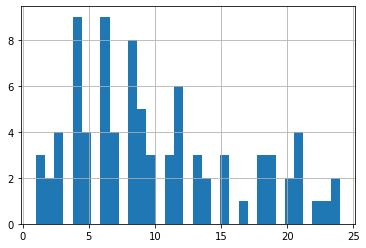

In [9]:
df_floor_total_null = df.loc[df['floors_total'].isna()]
df_floor_total_null['floor'].hist(bins = 33)

Мы увидели, что этаж квартиры может быть выше чем средний по выборке,а также узнали, что пропущенная этажность дома не подразумевает одноэтажную застройку. Можно попробовать заполнить общее количество этажей медианой в разрезе географического расположения, при условии, что этаж не больше этой самой медианы. Второй вариант - удалить эти строки, так как их доля в общем срезе крохотная, а при ошибке заполнения пропусков, может выйти так, что наше заполнение повлияет на последующее исследование зависимости стоимости от последнего этажа. Сейчас вечер воскресенься, я начала работу час назад и мне необходимо закончить ее сегодня, пожтому порадуемся, что доля таких значений от изначальной выборки( помним что 49 строк мы уже удалили), составляет всего 0,003, то есть 0,3% соответсвенно выбираем убрать, а не исказить результаты.

In [10]:
df = df.dropna(subset=['floors_total'])
#df.info() # проверяла, закомментировала, чтобы не тратить место и проще просматривать код

Если следовать далее, то можно увидеть, что у нас есть пропуски в столбцах с жилой площадью, площадью кухни, зато по каждой квартире имеется информация о количестве комнат. Жилая площадь и площадь зависят от количества комнат и общей площадит квартиры, поэтому самое простое решение заполнить пропуски в соответсвии с медианой по количеству комнат. Мы сначала заполним пропуски площади кухни, потом, чтобы не вышло так что сумма жилой и кухонной площади больше общей, найдем все жилые площади путем вычитания кухонной площади из общей.

In [11]:
display(df['kitchen_area'].isna().sum()) #посмотрим пропуски до
for room in df['rooms'].unique(): #цикл для каждого количества комнат
    median = df.loc[df['rooms'] == room, 'kitchen_area'].median() #расчет медианы
    df.loc[(df['kitchen_area'].isna()) & (df['rooms'] == room), 'kitchen_area'] = median #заполнение пропуска медианой
display(df['kitchen_area'].isna().sum()) #проверим

2222

/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


194

У нас по прежнему осталось 194 пропуска, кроме того код работает, но выдвет ошибку. Может не везде есть медиана? выведем строки на экран, чтобы понять в чем причина:

In [12]:
df.loc[(df['kitchen_area'].isna()) & (df['living_area'].isna()) & (df['rooms']=='1'), 'kitchen_area'] = 0
df.loc[(df['kitchen_area'].isna()) & (df['living_area'].isna()) & (df['rooms']=='1'), 'living_area'] = df['total_area']
display(df.loc[(df['kitchen_area'].isna() & df['living_area'].isna()) ])

/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
608,2,1850000.0,25.0,2019-02-20T00:00:00,0,2.65,10.0,NaN,7,False,...,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
780,9,2600000.0,26.1,2018-02-20T00:00:00,0,2.65,18.0,NaN,8,False,...,NaN,1.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
2409,4,1980000.0,27.0,2018-03-23T00:00:00,0,2.65,18.0,NaN,4,False,...,NaN,NaN,посёлок Петро-Славянка,20605.0,27165.0,0.0,NaN,2.0,663.0,75.0
3147,7,2170000.0,31.0,2017-12-30T00:00:00,0,2.60,12.0,NaN,12,False,...,NaN,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,198.0
3874,13,1700000.0,21.4,2015-02-11T00:00:00,0,2.70,3.0,NaN,2,False,...,NaN,NaN,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5749,20,3590000.0,25.0,2017-08-30T00:00:00,0,2.80,35.0,NaN,26,False,...,NaN,2.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,198.0
7818,11,3300000.0,27.3,2018-04-06T00:00:00,0,2.65,20.0,NaN,9,False,...,NaN,2.0,Санкт-Петербург,15990.0,13853.0,0.0,NaN,1.0,584.0,31.0
8454,7,2250000.0,19.0,2019-03-12T00:00:00,0,3.00,6.0,NaN,2,False,...,NaN,NaN,Санкт-Петербург,12430.0,7316.0,1.0,238.0,3.0,374.0,44.0
18028,11,3500000.0,31.0,2019-04-17T00:00:00,0,2.65,25.0,NaN,2,False,...,NaN,NaN,Санкт-Петербург,21460.0,16788.0,0.0,NaN,1.0,170.0,NaN
19392,5,71000000.0,371.0,2018-07-26T00:00:00,0,3.57,7.0,NaN,6,False,...,NaN,NaN,Санкт-Петербург,25257.0,6060.0,1.0,761.0,1.0,584.0,90.0


In [13]:
display(df.loc[df['kitchen_area'].isna()])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,2.65,24.0,15.50,2,False,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
349,4,2320000.0,25.00,2017-09-27T00:00:00,0,2.65,14.0,17.00,1,False,...,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,2.65,17.0,24.75,4,False,...,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000.0,34.40,2017-03-28T00:00:00,0,2.65,26.0,24.30,19,False,...,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,2.65,10.0,NaN,7,False,...,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.0,26.00,2017-09-01T00:00:00,0,2.65,25.0,18.00,16,False,...,NaN,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23442,0,2500000.0,27.70,2017-09-28T00:00:00,0,2.65,24.0,18.00,4,False,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.0
23554,15,3350000.0,26.00,2018-09-07T00:00:00,0,2.65,19.0,NaN,8,False,...,NaN,NaN,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0
23592,10,1450000.0,29.00,2017-11-11T00:00:00,0,2.65,9.0,18.00,8,False,...,NaN,2.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.0


Это студии! количество комнат равно 0. Чтож, заполним тогда пропуски нулями (в студии же нет кухни и фактически вся площадь жилая), а потом чтобы заполнить пропуски в жилой площади вычтем от общей площадь кухонь.

In [14]:
df['kitchen_area'] = df['kitchen_area'].fillna(0) #заполнили оставшиеся пропуски 0
df.loc[df['living_area'].isna(), 'living_area'] = df['total_area'] - df['kitchen_area'] #выполняем вычитание
df.info() #смотрим с какими столбцами работаем дальше

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23565 non-null int64
last_price              23565 non-null float64
total_area              23565 non-null float64
first_day_exposition    23565 non-null object
rooms                   23565 non-null int64
ceiling_height          23565 non-null float64
floors_total            23565 non-null float64
living_area             23565 non-null float64
floor                   23565 non-null int64
is_apartment            23565 non-null bool
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            23565 non-null float64
balcony                 12090 non-null float64
locality_name           23565 non-null object
airports_nearest        18041 non-null float64
cityCenters_nearest     18064 non-null float64
parks_around3000        18065 non-null float64
parks_nearest           8030 non-null float64
ponds_around3000

С балконами все просто, пропуск скорее всего говорит о том, что при заполнении объявления владелец не написал о наличии балкона по причине его отсутвия, заполним пропуски 0:

In [15]:
df['balcony'] = df['balcony'].fillna(0)

Остались столбцы с расстояними и наличием парков и прудов. Вполне логично заполнить расстояния до центра, аэропорта, парка и пруда заполнить медианными значениями с группировкой по населённому пункту. Так и поступим:

In [16]:
display(df['airports_nearest'].isna().sum(), df['cityCenters_nearest'].isna().sum(), df['parks_nearest'].isna().sum(), df['ponds_nearest'].isna().sum())
for location in df['locality_name'].unique(): #цикл для каждого количества комнат
    median_airport = df.loc[df['locality_name'] == location, 'airports_nearest'].median() #расчет медианы расстояния до аэропорта
    median_centre = df.loc[df['locality_name'] == location, 'cityCenters_nearest'].median() #расчет медианы рас-я до центра
    median_park = df.loc[df['locality_name'] == location, 'parks_nearest'].median() #расчет медианы до парка
    median_pond = df.loc[df['locality_name'] == location, 'ponds_nearest'].median() #расчет медианы до пруда
    df.loc[(df['airports_nearest'].isna()) & (df['locality_name'] == location), 'airports_nearest'] = median_airport #заполнение пропуска медианой
    df.loc[(df['cityCenters_nearest'].isna()) & (df['locality_name'] == location), 'cityCenters_nearest'] = median_centre #заполнение пропуска медианой
    df.loc[(df['parks_nearest'].isna()) & (df['locality_name'] == location), 'parks_nearest'] = median_park #заполнение пропуска медианой
    df.loc[(df['ponds_nearest'].isna()) & (df['locality_name'] == location), 'ponds_nearest'] = median_pond #заполнение пропуска медианой
display(df['airports_nearest'].isna().sum(), df['cityCenters_nearest'].isna().sum(), df['parks_nearest'].isna().sum(), df['ponds_nearest'].isna().sum())

5524

5501

15535

14529

5432

5432

5986

5517

Пропусков стало меньше, но они не испарились, ну да ладно заполним медианами по всей выборке, в конце концов для дальнейшего исследования это не должно исказить репрезентативность выборки.

In [17]:
median_airport = df['airports_nearest'].median() #расчет медианы расстояния до аэропорта
median_centre = df['cityCenters_nearest'].median() #расчет медианы рас-я до центра
median_park = df['parks_nearest'].median() #расчет медианы до парка
median_pond = df['ponds_nearest'].median() #расчет медианы до пруда
df['airports_nearest'] = df['airports_nearest'].fillna(median_airport)
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(median_airport)
df['parks_nearest'] = df['parks_nearest'].fillna(median_airport)
df['ponds_nearest'] = df['ponds_nearest'].fillna(median_airport)
df.describe() #смотрю что вышло, чтобы понять как заполнить парки и пруде в области 3км

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,18065.000000,23565.000000,18065.000000,23565.000000,20394.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.724530,10.675875,35.941093,5.878124,10.368305,0.593677,28321.625398,17092.272799,0.611569,7153.366454,0.769499,6656.786824,180.741395
std,5.681156,1.091093e+07,35.657060,1.078591,0.991026,6.594823,24.945337,4.871485,5.721133,0.960660,11091.054463,9222.973849,0.802088,11445.064879,0.938669,11118.090403,219.732782
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.200000,0.000000,21156.000000,10935.000000,0.000000,460.000000,0.000000,504.000000,45.000000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,30.800000,4.000000,9.000000,0.000000,26763.000000,14958.000000,0.000000,460.000000,1.000000,504.000000,95.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.700000,16.000000,43.300000,8.000000,11.500000,1.000000,34324.000000,26763.000000,1.000000,26763.000000,1.000000,993.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,571.000000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,26763.000000,3.000000,26763.000000,1580.000000


Пришло время "добить" пропуски. Остались парки и пруды в радиусе 3км, что ж в среднем в радиусе 3км меньше 1 парка или пруда :) пожтому условие, что если расстояние до ближайшего менее или ранво 3км=3000м, то 1 парк/пруд. Если более, то без сожаления ставим 0.

In [18]:
df.loc[(df['parks_around3000'].isna()) & (df['parks_nearest'] <= 3000), 'parks_around3000'] = 1
df.loc[(df['ponds_around3000'].isna()) & (df['ponds_nearest'] <= 3000), 'ponds_around3000'] = 1
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23565 non-null int64
last_price              23565 non-null float64
total_area              23565 non-null float64
first_day_exposition    23565 non-null object
rooms                   23565 non-null int64
ceiling_height          23565 non-null float64
floors_total            23565 non-null float64
living_area             23565 non-null float64
floor                   23565 non-null int64
is_apartment            23565 non-null bool
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            23565 non-null float64
balcony                 23565 non-null float64
locality_name           23565 non-null object
airports_nearest        23565 non-null float64
cityCenters_nearest     23565 non-null float64
parks_around3000        23565 non-null float64
parks_nearest           23565 non-null float64
ponds_around300

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,20394.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.724530,10.675875,35.941093,5.878124,10.368305,0.593677,28321.625398,17092.272799,0.471589,7153.366454,0.592786,6656.786824,180.741395
std,5.681156,1.091093e+07,35.657060,1.078591,0.991026,6.594823,24.945337,4.871485,5.721133,0.960660,11091.054463,9222.973849,0.748513,11445.064879,0.883667,11118.090403,219.732782
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.200000,0.000000,21156.000000,10935.000000,0.000000,460.000000,0.000000,504.000000,45.000000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,30.800000,4.000000,9.000000,0.000000,26763.000000,14958.000000,0.000000,460.000000,0.000000,504.000000,95.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.700000,16.000000,43.300000,8.000000,11.500000,1.000000,34324.000000,26763.000000,1.000000,26763.000000,1.000000,993.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,571.000000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,26763.000000,3.000000,26763.000000,1580.000000


Остались только пропуске в столбце с количеством дней размещения. Их просто так не заполнить, мы понятия не имеем. Однако, далее в исследовании посмотрим распределение количества дней размещения относительно даты публикации. Раз уж заговорили о датах, то приведем в порядок типы данных: а то уже смотреть больно. Начнем  сдаты размещения, а потом изменим вещественные числа на целочисленные.

In [19]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format ='%Y%m%dT%H:%M:%S')
display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,26763.0,0.0,584.5,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,149.5,9,False,...,9.5,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [20]:
df['floors_total'] = df['floors_total'].astype('int')
df['rooms'] = df['rooms'].astype('int')
df['floor'] = df['floor'].astype('int')
df['balcony'] = df['balcony'].astype('int')
df['airports_nearest'] = df['airports_nearest'].astype('int')
df['cityCenters_nearest'] = df['cityCenters_nearest'].astype('int')
df['parks_around3000'] = df['parks_around3000'].astype('int')
df['ponds_nearest'] = df['ponds_nearest'].astype('int')
df['ponds_around3000'] = df['ponds_around3000'].astype('int')
df['parks_nearest'] = df['parks_nearest'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23565 non-null int64
last_price              23565 non-null float64
total_area              23565 non-null float64
first_day_exposition    23565 non-null datetime64[ns]
rooms                   23565 non-null int64
ceiling_height          23565 non-null float64
floors_total            23565 non-null int64
living_area             23565 non-null float64
floor                   23565 non-null int64
is_apartment            23565 non-null bool
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            23565 non-null float64
balcony                 23565 non-null int64
locality_name           23565 non-null object
airports_nearest        23565 non-null int64
cityCenters_nearest     23565 non-null int64
parks_around3000        23565 non-null int64
parks_nearest           23565 non-null int64
ponds_around3000   

Вроде закончили, осталиви 99,43% выборки - меня прям устравиает. Можно было бы удалить строки с пропусками дней размещения объявления, но пока торопиться не будем. Лучше перейдем к расчетов необходимых для анализа столбцов (к тому же время поджимает, интересно я вообще успею?)

## Расчёты и добавление результатов в таблицу

Добавим столбцы необходимые для анализа и поиска зависимостей и связей. В первую очередь подсчитаем и добавим цену квадратного метра.

In [21]:
df['price_per_metre'] = df['last_price'] / df['total_area']
display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_metre
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,0,Санкт-Петербург,18863,16028,1,482,2,755,NaN,120370.370370
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,2,посёлок Шушары,12817,18603,0,26763,0,584,81.0,82920.792079
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,0,Санкт-Петербург,21741,13933,1,90,2,574,558.0,92785.714286
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,149.5,9,False,...,0,Санкт-Петербург,28098,6800,2,84,3,234,424.0,408176.100629
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,0,Санкт-Петербург,31856,8098,2,112,1,48,121.0,100000.000000


Добавим столбцы с днем недели, месяцем и годом публикации:

In [22]:
df['publication_weekday'] = df['first_day_exposition'].dt.weekday
df['publication_month'] = df['first_day_exposition'].dt.month
df['publication_year'] = df['first_day_exposition'].dt.year
display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_metre,publication_weekday,publication_month,publication_year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,16028,1,482,2,755,NaN,120370.370370,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,18603,0,26763,0,584,81.0,82920.792079,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,13933,1,90,2,574,558.0,92785.714286,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,149.5,9,False,...,6800,2,84,3,234,424.0,408176.100629,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,8098,2,112,1,48,121.0,100000.000000,1,6,2018


Добавим категорию этажности: первый, последний или другой:

In [23]:
def floor_category(row): #пишем мини функцию для определения категории этажности
    if row['floor'] == 1: return 'первый'
    if row['floor'] == row['floors_total']: return 'последний'
    return 'другой'
df['floor_category'] = df.apply(floor_category, axis = 1) 
display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_metre,publication_weekday,publication_month,publication_year,floor_category
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,1,482,2,755,NaN,120370.370370,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0,26763,0,584,81.0,82920.792079,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,1,90,2,574,558.0,92785.714286,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,149.5,9,False,...,2,84,3,234,424.0,408176.100629,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,2,112,1,48,121.0,100000.000000,1,6,2018,другой


Теперь добавим столбцы с соотношением жилой и общей площади, а также отношением площади кухни к общей:

In [24]:
df['living_to_total'] = df['living_area'] / df['total_area']
df['kitchen to total'] = df['kitchen_area'] / df['total_area']
display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_metre,publication_weekday,publication_month,publication_year,floor_category,living_to_total,kitchen to total
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2,755,NaN,120370.370370,3,3,2019,другой,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0,584,81.0,82920.792079,1,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,2,574,558.0,92785.714286,3,8,2015,другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,149.5,9,False,...,3,234,424.0,408176.100629,4,7,2015,другой,0.940252,0.059748
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1,48,121.0,100000.000000,1,6,2018,другой,0.320000,0.410000


Мммм 29 столбцов, самое время в них не запутаться. На всякий случай выведем все методом info(), чтобы видеть все что у нас есть и пойдем дальше, ведь все необходимые столбцы добавлены.

In [25]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 29 columns):
total_images            23565 non-null int64
last_price              23565 non-null float64
total_area              23565 non-null float64
first_day_exposition    23565 non-null datetime64[ns]
rooms                   23565 non-null int64
ceiling_height          23565 non-null float64
floors_total            23565 non-null int64
living_area             23565 non-null float64
floor                   23565 non-null int64
is_apartment            23565 non-null bool
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            23565 non-null float64
balcony                 23565 non-null int64
locality_name           23565 non-null object
airports_nearest        23565 non-null int64
cityCenters_nearest     23565 non-null int64
parks_around3000        23565 non-null int64
parks_nearest           23565 non-null int64
ponds_around3000   

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_metre,publication_weekday,publication_month,publication_year,living_to_total,kitchen to total
count,23565.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,...,23565.000000,23565.000000,23565.000000,20394.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.724530,10.675875,35.941093,5.878124,10.368305,0.593677,...,7153.362954,0.592786,6656.777212,180.741395,9.940584e+04,2.567367,6.401570,2017.371016,0.584447,0.186556
std,5.681156,1.091093e+07,35.657060,1.078591,0.991026,6.594823,24.945337,4.871485,5.721133,0.960660,...,11445.066949,0.883667,11118.095767,219.732782,5.038943e+04,1.788279,3.492948,1.037393,0.123014,0.075714
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,13.000000,1.000000,1.118349e+02,0.000000,1.000000,2014.000000,0.021583,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.200000,0.000000,...,460.000000,0.000000,504.000000,45.000000,7.656613e+04,1.000000,3.000000,2017.000000,0.500000,0.133136
50%,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,30.800000,4.000000,9.000000,0.000000,...,460.000000,0.000000,504.000000,95.000000,9.500000e+04,3.000000,6.000000,2017.000000,0.580645,0.172043
75%,14.000000,6.790000e+06,69.700000,3.000000,2.700000,16.000000,43.300000,8.000000,11.500000,1.000000,...,26763.000000,1.000000,993.000000,231.000000,1.142132e+05,4.000000,10.000000,2018.000000,0.658228,0.232416
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,571.000000,33.000000,112.000000,5.000000,...,26763.000000,3.000000,26763.000000,1580.000000,1.907500e+06,6.000000,12.000000,2019.000000,1.000000,0.787879


## Исследовательский анализ данных

Прежде чем сделать выводы изучим важные параметры: площадь, цена, число комнат, высота потолков. Для каждого параметра пострим гистограмму, диаграмму размаха и применим метод describe.

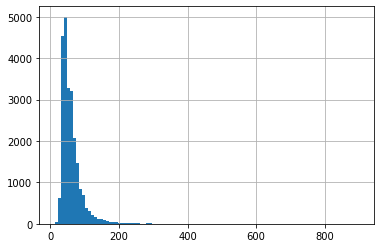

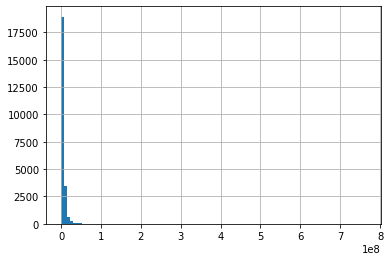

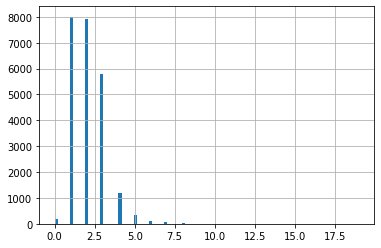

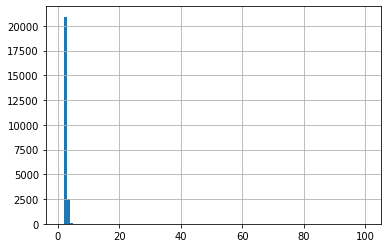

In [26]:
import matplotlib.pyplot as plt
df['total_area'].hist(bins = 100, range =(12, 900))
plt.show()
df['last_price'].hist(bins = 100, range =(df['last_price'].min(), df['last_price'].max()))
plt.show()
df['rooms'].hist(bins = 100, range =(0, 19))
plt.show()
df['ceiling_height'].hist(bins = 100, range =(1, 100))
plt.show()

Покажу что умею строить диаграмму размаха и использовать метод дескрайб, который показывает нам стандартное отклонение:

(0, 5)

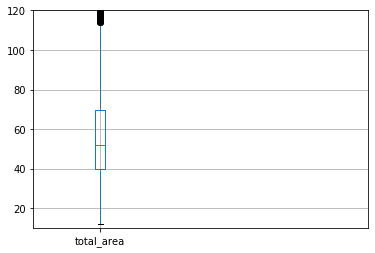

In [27]:
df.boxplot(column = ['total_area'])
plt.ylim(10, 120)
plt.xlim(0, 5) 

In [28]:
df['total_area'].describe()

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

На самом деле ххочу изучить взаимосвязь этих параметров и построить матрицу рассеивания и узнать коэффициент корреляции.

In [29]:
df['index'] = df.index
data = df.pivot_table(index = 'index', values = ['total_area','rooms','ceiling_height','price_per_metre'])
display(data.corr())

,ceiling_height,price_per_metre,rooms,total_area
ceiling_height,1.000000,0.099885,0.047958,0.080765
price_per_metre,0.099885,1.000000,0.055680,0.302571
rooms,0.047958,0.055680,1.000000,0.758735
total_area,0.080765,0.302571,0.758735,1.000000


Вот тут показательно: мы видим что есть корреляция количества комнат и общей площади, а она конечно есть, но вот уже корреляция между ценой и количеством комнат слабенькая, зато между ценой и общей площадью тоже небольшая. Ладно, посмотрим картинки:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f52ba11a190>,
      dtype=object)

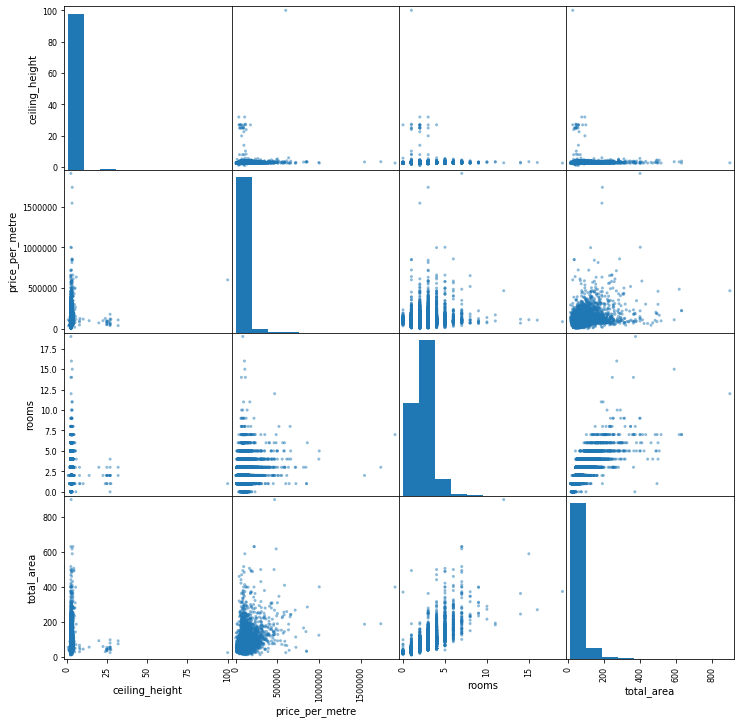

In [30]:
pd.plotting.scatter_matrix(data, figsize = (12,12))

Мы помним, что на гистограмме и диаграмме размаха видно огромное количество выбросов, а что будет если их убрать? Попробуем исследовать данные, которые входят в межквартильный размах:

,ceiling_height,last_price,rooms,total_area
ceiling_height,1.000000,0.243821,-0.106853,0.127886
last_price,0.243821,1.000000,0.411698,0.678233
rooms,-0.106853,0.411698,1.000000,0.801869
total_area,0.127886,0.678233,0.801869,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f52c335c410>,
      dtype=object)

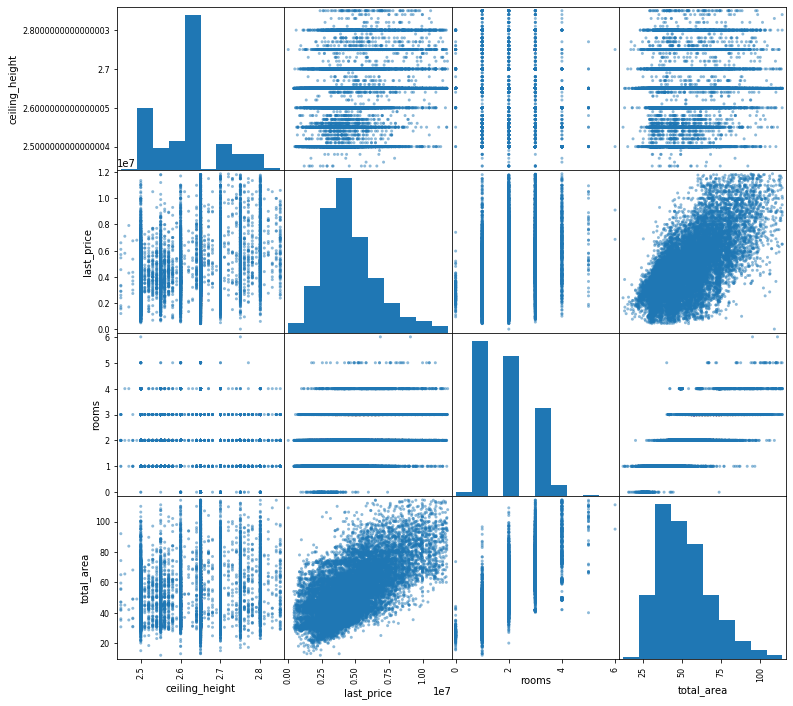

In [31]:
Q1 = df['total_area'].quantile(0.25)  #считаем IQR
Q3 = df['total_area'].quantile(0.75)
IQR = Q3 - Q1 
Q1_2 = df['ceiling_height'].quantile(0.25)  
Q3_2 = df['ceiling_height'].quantile(0.75)
IQR_2 = Q3_2 - Q1_2
Q1_3 = df['rooms'].quantile(0.25)  
Q3_3 = df['rooms'].quantile(0.75)
IQR_3 = Q3_3 - Q1_3
Q1_4 = df['last_price'].quantile(0.25)  
Q3_4 = df['last_price'].quantile(0.75)
IQR_4 = Q3_4 - Q1_4
filtered_data = df.query('((@Q1 - 1.5 * @IQR) <= total_area <= (@Q3 + 1.5 * @IQR)) & ((@Q1_2 - 1.5 * @IQR_2) <= ceiling_height <= (@Q3_2 + 1.5 * @IQR_2))& ((@Q1_3 - 1.5 * @IQR_3) <= rooms <= (@Q3_3 + 1.5 * @IQR_3)& ((@Q1_4 - 1.5 * @IQR_4) <= last_price <= (@Q3_4 + 1.5 * @IQR_4)))') # срез по межквартильному размаху 
#display(filtered_data)
filtered_data.describe()
filtered_data_multi = filtered_data.pivot_table(index = 'index', values = ['total_area','rooms','ceiling_height','last_price'])
display(filtered_data_multi.corr())
pd.plotting.scatter_matrix(filtered_data_multi, figsize = (12,12))

По графикам видно, что явная корреляция с ценой есть только у общей площади. Кроме того видно, как с увеличением площади увеличивается веротяность того что много комнат, при этом связь количества комнат с ценой -неочевидная.

Изучим время продажи квартиры: Построим гистограмму, посчитаем среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f52b9d49a10>]],
      dtype=object)

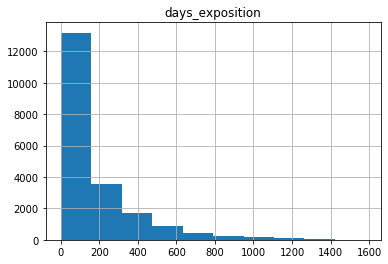

In [34]:
df.hist('days_exposition')

Большая часть квартир продается менее чем за 200 дней. Однако посчитаем среднее и медиану, а также межквартильный размах:

In [35]:
display(df['days_exposition'].median())
display(df['days_exposition'].describe())
Q1 = df['days_exposition'].quantile(0.25)  
Q3 = df['days_exposition'].quantile(0.75)
IQR = Q3 - Q1
display(IQR)

95.0

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

186.0

Медиана отличается от среднего пркатически в два раза, а межквартильный размех составляет 186. Таким образом, можно сделать вывод, что все квартиры, которые продавались дольше 186 дней продавались необычно долго.
На всякий случай применим и этот фильр к filtered_data:


Чтобы ответить на вопрос про быстрые продажи попробуем исследовать зависимость количества дней, которое провисело объявление от разных факторов. Возможно быстрые продажи зависят от того, когда было размещено объявление.

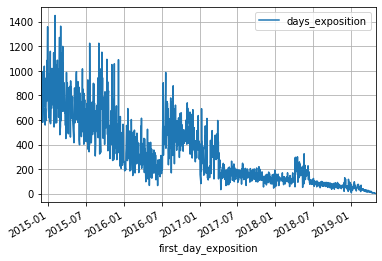

In [85]:
df.pivot_table(index = 'first_day_exposition', values = 'days_exposition' ).plot(grid=True)


Создается впечатление, что для каждого периода времени срок быстрой продажи и необычно долгой будет разным. На графике видно, как с годами меняется диапазон времени, который нужен, чтобы продать квартиру. На самом деле это очень правдободоно, потому что рынок недвижимости меняется, появляются сервисы и приложения для удобной продажи квартиры, к тому же к 2019 году все больше любдей стремится переехать в Петербург и область, а значит с ростом спроса должно уменьшаться время, требуемое на продажу квартиры.    
    Посмотрим график уже не по всему датасету, а по отфильтрованным данным, который отобразит нам как меняется среднее время продажи квартиры относительно года публикации объявления:

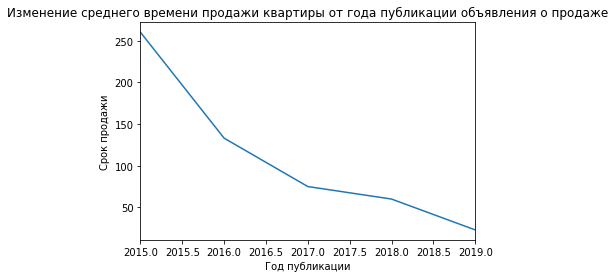

In [91]:
filtered_data.groupby('publication_year')['days_exposition'].median().plot()


plt.title('Изменение среднего времени продажи квартиры от года публикации объявления о продаже')
plt.xlabel('Год публикации')
plt.ylabel('Срок продажи')
plt.show()


Теперь чтобы ответить на вопрос о том, что такое слишком быстрая или слишком долгая сделка, лучше заранее спросить какой год подразумевается. По-прежнему для всего дата сета это будут границы межквартильного размаха, однако для более точного ответа на вопрос необходимо уточнять период, который нас интересует. 
    В среднем квартиры стали продаваться в 2019 году куда быстрее, чем в 2015, видимо из-за спроса, который так же отразился на средней стоимости (это было далее). Надеюсь я справилась с ответом на комментарий.

In [72]:
filtered_data = filtered_data.query('(@Q1 - 1.5 * @IQR) <= days_exposition <= (@Q1 + 1.5 * @IQR)')

Теперь нужно убрать редкие значения. Мы уже проделывали эту работу когда изучали гистограммы, диаграммы размаха и сократили отфильтрованную выборку до межквартильного интервала. Но на всякий случай посмотрим на стандартное отклонение, если нет ничего выпиющего, то все норм.

In [38]:
filtered_data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,ponds_around3000,ponds_nearest,days_exposition,price_per_metre,publication_weekday,publication_month,publication_year,living_to_total,kitchen to total,index
count,15969.000000,1.596900e+04,15969.000000,15969.000000,15969.000000,15969.000000,15969.000000,15969.000000,15969.000000,15969.000000,...,15969.000000,15969.000000,15969.000000,15969.000000,15969.000000,15969.000000,15969.000000,15969.000000,15969.000000,15969.000000
mean,9.517002,4.547246e+06,50.692115,1.840378,2.629393,11.371031,29.883307,6.189930,9.263795,0.613000,...,0.484251,7322.181978,122.909637,90647.771000,2.601478,6.606112,2017.366272,0.580562,0.192768,11853.658589
std,5.525841,1.993743e+06,16.624284,0.860953,0.079126,6.707768,12.898741,5.039554,3.489052,0.937232,...,0.778528,11498.930817,118.178630,28093.608016,1.790188,3.487941,0.843187,0.121769,0.073521,6828.605098
min,0.000000,1.219000e+04,12.000000,0.000000,2.450000,1.000000,2.000000,1.000000,0.000000,0.000000,...,0.000000,16.000000,1.000000,111.834862,0.000000,1.000000,2015.000000,0.069588,0.000000,1.000000
25%,6.000000,3.200000e+06,38.000000,1.000000,2.600000,5.000000,18.000000,2.000000,7.000000,0.000000,...,0.000000,504.000000,39.000000,74324.324324,1.000000,3.000000,2017.000000,0.500000,0.139535,5953.000000
50%,9.000000,4.200000e+06,46.400000,2.000000,2.650000,9.000000,28.800000,5.000000,9.000000,0.000000,...,0.000000,504.000000,78.000000,91447.368421,3.000000,7.000000,2017.000000,0.574194,0.180873,11833.000000
75%,13.000000,5.500000e+06,60.600000,2.000000,2.650000,16.000000,38.000000,9.000000,10.700000,1.000000,...,1.000000,26763.000000,173.000000,107049.608355,4.000000,10.000000,2018.000000,0.653333,0.239130,17754.000000
max,50.000000,1.186686e+07,114.200000,6.000000,2.850000,52.000000,102.000000,33.000000,50.000000,5.000000,...,3.000000,26763.000000,510.000000,292307.692308,6.000000,12.000000,2019.000000,1.000000,0.787879,23695.000000


Теперь надо узнать какие факторы больше всего влияют на стоимость квартиры. Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. 
Попробуем для наглядности использовать диаграмму размаха, так как она покажет нам и наибольшее скопление значений и сразу будет видно медиану и выбросы.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(1, 250000)

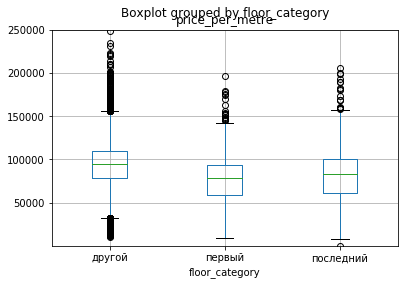

In [39]:
filtered_data.boxplot(column = 'price_per_metre', by='floor_category')
plt.ylim(1,250000)

Из графика наглядно видно медианы и сосредоточение основной массы значений:квартиры на первом и последнем этажах имеют меньшую медианную стоимоть квадратного метра, чем на остальных этажах. Чтож наименьшая медиана и в целом цены на первом этаже понятно почему не угодили, а споследним что не так, если есть лифт...Кстати видно насколько мы избаились от выбросов, если сравнить с такой же диаграммой по неотфильтрованным данным, но место занимать не буду, просто хочу отметить, что все работет). Провернем тоже самое с числом комнат. Я уже показывала, что умею строить диаграмму рассеивания, но для наглядности хочу использовать диаграмму размаха:

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(1, 250000)

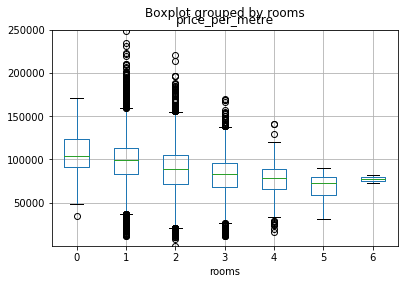

In [40]:
filtered_data.boxplot(column = 'price_per_metre', by='rooms')
plt.ylim(1,250000)

По нисхождению медианы можно сделать вывод, что чем больше комнат, тем дешевле обходится квадратный метр квартиры. В целом логично. Теперь посмотрим что происходит с ценой при разном расстоянии от центра, здесь уде посмотрим на диаграмму рассеяния:

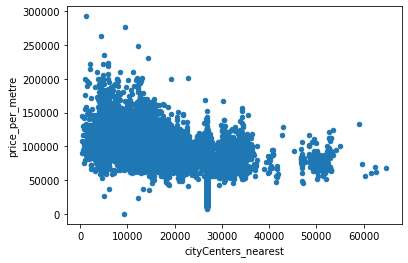

In [41]:
filtered_data.plot(x='cityCenters_nearest', y='price_per_metre', kind = 'scatter')

Конечно видно, что если квартира ближе к центру то больше вероятность того, что цена за квадратный метр будет выше, но не сказать, что все что ближе к центру будет обязательно дороже всего, что дальше от центра.  
Теперь посмотрим как отличается цена в зависимости от даты размещения:


/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

(1, 250000)

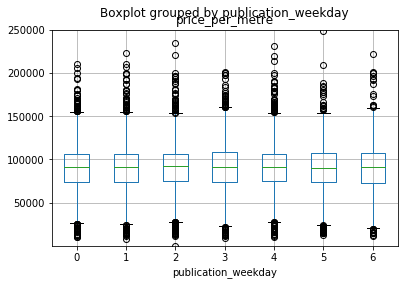

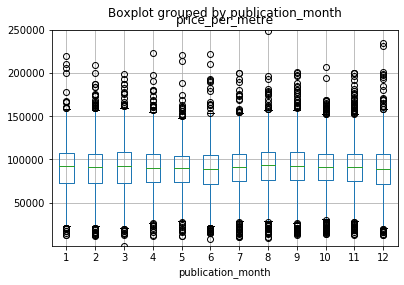

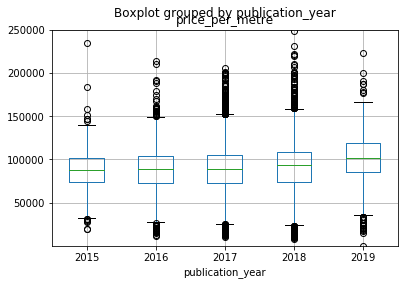

In [42]:
filtered_data.boxplot(column = 'price_per_metre', by='publication_weekday')
plt.ylim(1,250000)
filtered_data.boxplot(column = 'price_per_metre', by='publication_month')
plt.ylim(1,250000)
filtered_data.boxplot(column = 'price_per_metre', by='publication_year')
plt.ylim(1,250000)

День недели когда было размещено объявление абсолютно точно на цену квадратного метра не влияет, тоже самое относится и к месяцам.А вот если смотреть на годы публикации, то становится ясно - квадратные метры дорожают.

Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитайтаем среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. 

In [43]:
df.groupby('locality_name').agg({'rooms':'count', 'price_per_metre': 'mean'}).sort_values(by='rooms', ascending = False).head(10) #в данном случае комнаты эт прост счетчик, просто морально проще комнаты поставить, а вообще мы считаем количество объявлений по этому счетчику, а потом среднюю стоимость квадратного метра и все сортируем в порядке убывания

,rooms,price_per_metre
locality_name,,
Санкт-Петербург,15651,114868.877341
посёлок Мурино,520,85673.259928
посёлок Шушары,439,78551.344545
Всеволожск,398,68654.473986
Пушкин,369,103125.819291
Колпино,338,75424.579098
посёлок Парголово,327,90175.913458
Гатчина,307,68746.146763
деревня Кудрово,299,92473.547576


То что в СПб самый дорогой квадратный метр сомнений не было, следом Пушкин-тоже понятно. А вот из 10ки самых поппулярных самым демократичным по ценам оказался Выборг. Наверно потому что там негде работать( Хотя удаленщику-везде хорошо. (Жаль мне завтра ехать на работу, а я все еще не сделала проект)

Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


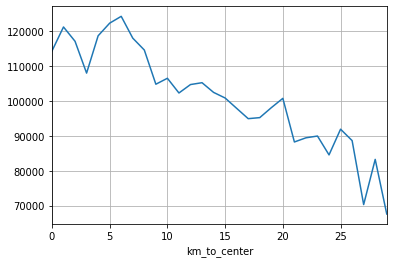

In [44]:
spb_flats = filtered_data.loc[filtered_data.loc[:,'locality_name']==  'Санкт-Петербург'] #квратиры в Спб
spb_flats['km_to_center'] = (spb_flats['cityCenters_nearest'] / 1000).round() #километры
spb_flats_grouped = spb_flats.groupby('km_to_center')['price_per_metre'].mean().astype(int) #Группипуем данные по средней цене квадратного метра и строим график
spb_flats_grouped.plot(x='km_to_cente', y='price_per_metre', grid = True)

В Питере чем ближе к центру, тем дороже. По графику видно, что несмотря на взлеты и падения линия тренда упорно идет вниз. Не могу понять, почему идет спад на квадратный метр в точке 3км. Тем не менее ограничим роадиус центра- 3км.

Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?  
Для ответа на данный вопрос будет работать по двум датафреймам: spb_flats и filtered_data. Построим гистограммы, чтобы сравнить:

Чтобы отфильтровать далее квартиры на расстоянии менее или равно 3км от центра использую query

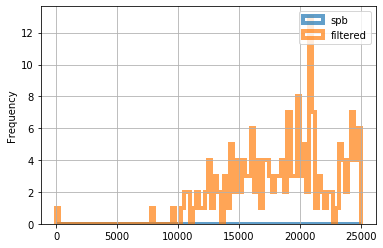

In [92]:
spb_flats_stat = spb_flats.query('km_to_center <= 3').pivot_table(index = 'index', values =['price_per_metre','rooms','cityCenters_nearest','publication_year','floor','total_area'])
filtered_data_stat = filtered_data.pivot_table(index = 'index', values =['price_per_metre','rooms','cityCenters_nearest','publication_year','floor','total_area'])
ax = spb_flats_stat.plot(kind='hist', y='price_per_metre',histtype='step',range=(1,25000),bins =100,linewidth=4,alpha=0.7, label ='spb')
filtered_data_stat.plot(kind='hist', y='price_per_metre',histtype='step',range=(1,25000),bins =100,linewidth=4,alpha=0.7, label ='filtered', ax = ax, grid = True, legend = True)

 Из графика видно, что ничего не видно :) Наверно таких квартир очень мало. Выведем на экран информацию о них и о квартирах в отфильтрованном датасете:

In [96]:
display(spb_flats_stat.describe())
display(filtered_data_stat.describe())

,cityCenters_nearest,floor,price_per_metre,publication_year,rooms,total_area
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,2324.974359,2.820513,113923.970416,2017.035897,2.353846,65.351897
std,862.172594,1.444360,29543.056023,0.898879,0.875157,21.320636
min,399.000000,1.000000,63524.590164,2015.000000,0.000000,12.000000
25%,1755.000000,2.000000,93883.193538,2017.000000,2.000000,48.500000
50%,2370.000000,2.000000,109375.000000,2017.000000,2.000000,64.800000
75%,3136.500000,4.000000,126411.862991,2018.000000,3.000000,81.450000
max,3498.000000,6.000000,292307.692308,2019.000000,6.000000,114.200000


,cityCenters_nearest,floor,price_per_metre,publication_year,rooms,total_area
count,14506.000000,14506.000000,14506.000000,14506.000000,14506.000000,14506.000000
mean,18444.862402,6.221495,90874.811700,2017.450986,1.830966,50.485055
std,8493.229365,5.038079,28028.459416,0.792661,0.859344,16.504591
min,399.000000,1.000000,111.834862,2015.000000,0.000000,12.000000
25%,12264.500000,3.000000,74581.396938,2017.000000,1.000000,37.800000
50%,15881.000000,5.000000,91703.056769,2018.000000,2.000000,46.105000
75%,26763.000000,9.000000,107142.857143,2018.000000,2.000000,60.190000
max,64857.000000,33.000000,292307.692308,2019.000000,6.000000,114.200000


И правда на фоне всего датасета таких квартир оказалось мало - всего 195. Если посмотреть данные о столбце с этажами и увидеть, что максимальный этаж 6, можно порадоваться, что действительно выбрали квартиры правильно (тк в центре малоэтажная застройка). Разве что максимальное расстояние до центра 3498 метров, что ок, так как мы округляли при переводе метров в километры. Теперь по фактам: Средний этаж квартир в центре в СПБ, вдвое меньше, чем по всему датасету - логично! Средняя цена за квадратный метр больше, чем по всему датасету - что тоже нас радует, так как логично! Самая дорогая квартира в датасете - в центре спб (по стоимости за кв/метр). Общая площадь, как и количетсво комнат в квартрах в центре СПБ больше, чем по всем данным, что тоже похоже на правду.

,cityCenters_nearest,floor,price_per_metre,publication_year,rooms,total_area
cityCenters_nearest,1.000000,-0.004971,-0.177869,-0.027429,-0.117743,-0.101318
floor,-0.004971,1.000000,0.096843,0.040721,0.185074,0.148731
price_per_metre,-0.177869,0.096843,1.000000,0.248005,-0.277182,-0.444653
publication_year,-0.027429,0.040721,0.248005,1.000000,-0.134176,-0.227670
rooms,-0.117743,0.185074,-0.277182,-0.134176,1.000000,0.771774
total_area,-0.101318,0.148731,-0.444653,-0.227670,0.771774,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f52b2a7d390>,
      dtype=object)

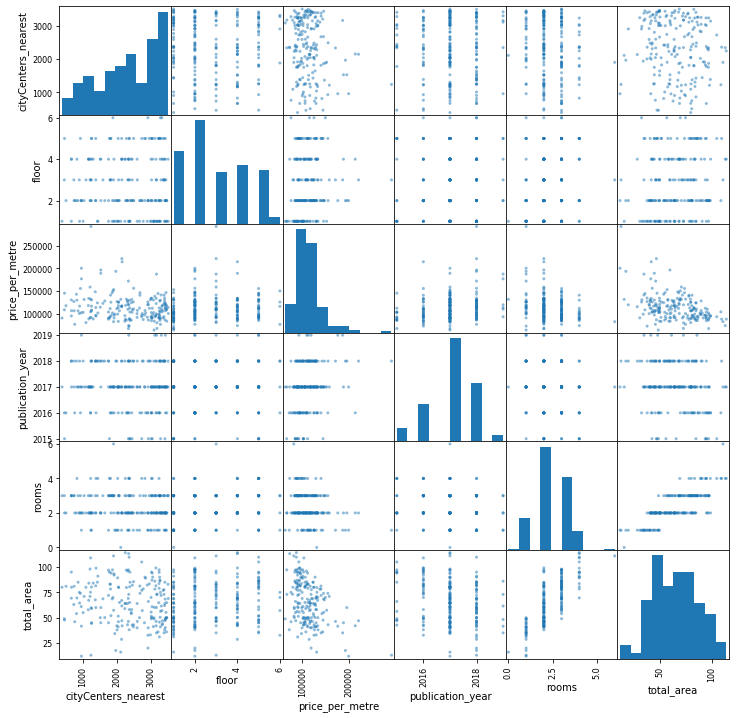

In [99]:
display(spb_flats_stat.corr())
pd.plotting.scatter_matrix(spb_flats_stat, figsize = (12,12))

Прямой взаимосвязи нет( 

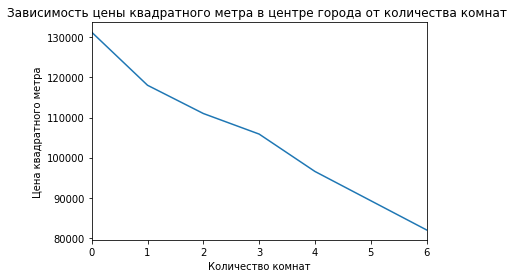

In [98]:
spb_flats_stat.groupby('rooms')['price_per_metre'].median().plot()


plt.title('Зависимость цены квадратного метра в центре города от количества комнат ')
plt.xlabel('Количество комнат')
plt.ylabel('Цена квадратного метра')
plt.show()

Действительно, как и в общем по датасету чем больше комнат, тем дешевле квадратный метр. По данным общей площади строить график уже не буду, там корреляция площади с количеством комнат 0,77, что весьма понятно, так как чем бьольше комнат, тем обычно больше площадь. И соответсвенно от эффекта масштаба снижается средняя стоимость за квадратный метр.

По поводу расстояния комментарий такой: мы вывели параметры по всем данным и по квартирам в центре и я выше уже отписалась, что стоимость квдратного метра выше, средний этаж меньше (ну так как малоэтажная застройка), больше средняя площадь и количество комнат, так как это вам не 20этажки в новых районах. Теперь рассмотрим что у нас происходит с ценой в зависимости от года, хотя тут наверное понятно, что тенденция к росту стоимости.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(1, 250000)

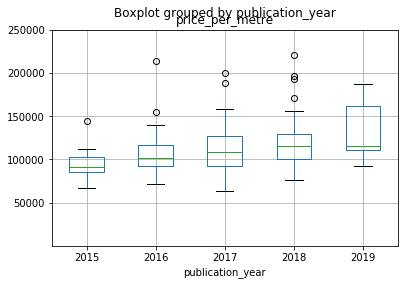

In [100]:
spb_flats.query('km_to_center <= 3').boxplot(column = 'price_per_metre', by='publication_year')
plt.ylim(1,250000)

Сразу видно незначительное количество выбросов. Если посмотреть на такой же график по всему датасету видно как отличаются медианы по годам, однако несмотря на то что "ящик" в 2019 году больше, медиана все же на уровне 2018 года. Хотя все еще видно тенденцию на рост стоимости квадратного метра. На всякий случай сделаем более приятный для восприятия график:

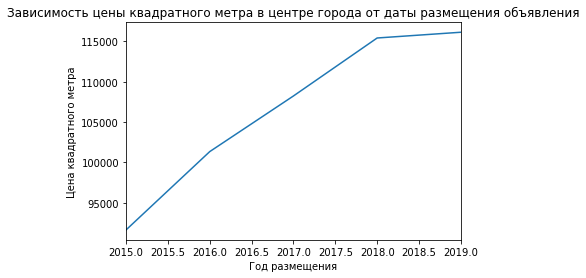

In [103]:
spb_flats.query('km_to_center <= 3').groupby('publication_year')['price_per_metre'].median().plot()


plt.title('Зависимость цены квадратного метра в центре города от даты размещения объявления')
plt.xlabel('Год размещения')
plt.ylabel('Цена квадратного метра')
plt.show()

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(1, 250000)

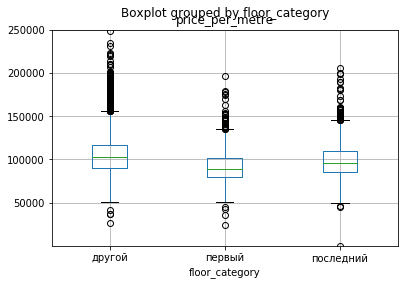

In [47]:
spb_flats.boxplot(column = 'price_per_metre', by='floor_category')
plt.ylim(1,250000)

Суть такая же как у общего массива данных.

## Общий вывод

Ну что можно сказать точно, чем меньше площадь квартиры - тем дороже выходит цена за квадратный метр.
Самые дорогие квадратные метры -в СПБ, чем ближе к центру города - тем дороже. 
Первые этажи при прочих равных дешевле, чем последние и все остальные. Последние, дешевле чем все остальные (надо было еще 13 этаж проверить).
Нет прямой взаимосвязи между многими параметрами, нельзя сказать, что они совсем не влияют на цену, возможно просто у них между собой более сложные связи и на цену влиет не какой то параметр а их вариации в СОВОКУПНОСТИ. Этого мы в исследовании не проверяли, но на самолм деле с данными можно проделать много интересной работы, жаль я весь проект оставила на последний день и вышло куцо, но главное пункты выполнила (надеюсь на милость ревьюера).
День недели никак не влияет на стоимость квартиры, как и месяц, а вот с годами квадратные метры только дорожают. Квартиры, объявления которых провисели больше 186 - нетипично долго продаются (интересно было бы кстати посмотреть, почему, но уже нет сил).

Мне кажется, что зависимость стоимости от факторов немного сложнее, чем линенйая и надо искать комбинации факторов, чтобы верно оценивать стоимость квдратного метра, а не искать просто сходные квартиры и смотреть их медианную стоимость.

In [105]:
result = [['Центр СПб','113924','65,35'],['Все данные','90875','50,48'],['Разница','23049','14,87']]
columns = ['Наименование','Средняя цена за кв.метр','Средняя площадь']
fin_results = pd.DataFrame(data=result, columns = columns)
display(fin_results)

,Наименование,Средняя цена за кв.метр,Средняя площадь
0,Центр СПб,113924,"65,35"
1,Все данные,90875,"50,48"
2,Разница,23049,"14,87"
